<span style="color:#2E74B5">
<center>
  <h2 style="margin: 0;">Computer Science Capstone</h2>
  <h1 style="margin: 0;">Gluten-Free Scanner</h1>
</center>
</span>

<span style="color:#2E74B5">
  <h2 style="margin-bottom: 0;">Introduction</h2>
</span>
<p style="margin-top: 0;">Welcome to the Gluten-Free Scanner application, which was created using Deepnote. This web-based interface is designed to help you scan and analyze food labels to detect gluten content efficiently and accurately.
</p>

<span style="color:#2E74B5">
  <h3 style="margin-bottom: 0; margin-left: ;">How It Works</h3>
</span>

- Automated Scanning: The application automatically scans uploaded webp files of food labels. These files are pre-uploaded and ready for analysis, ensuring a smooth and fast user experience. 

- Model Details: The machine learning model used for this application has been trained on a diverse dataset to detect gluten content with high accuracy. It analyzes the ingredients listed on the food labels and provides a prediction along with the confidence level of the prediction.

<span style="color:#2E74B5">
  <h3 style="margin-bottom: 0;">What You Need to Do</h3>
</span>

- Review Results: Please verify the terminal outputs, one which contains the results of three (3) scanned images. Each result includes the input, the model’s prediction, and the confidence level as a measurement metric.

- Download Files: The webp files used for scanning and the trained model and vectorizer are included in the provided zip file for your convenience.

> Running the entire notebook will take approximately 4 minutes.

<hr>

<span style="color:#2E74B5">
  <h3>Data Preparation Code</h3>
</span>
<p style="margin-top: 0; margin-bottom: 0;">Below is the code used to prepare the dataset. This code snippet prepares the FoodData dataset for analysis by identifying gluten-containing ingredients. This script processes a dataset of food products to label those containing gluten. It involves loading the data, defining gluten-containing ingredients, labeling it, handling missing values, sampling 100,000 entries, and saving the sampled data with gluten labels to a new file. The original dataset can be found at:</p>

[FoodData Central Dataset](https://fdc.nal.usda.gov/fdc-datasets/FoodData_Central_branded_food_csv_2024-04-18.zip)

> Due to the large size of the original dataset, branded_food.csv (912MB), this code is executable, taking approximately 40 seconds in the current notebook environment, and will create gluten_free_data.csv around 28MB.

In [ ]:
import pandas as pd

# Load Dataset
file_path = '/datasets/brandedfood/branded_food.csv'
full_df = pd.read_csv(file_path)

# Define Gluten-Containing Ingredients
gluten_ingredients_list = [
    'barley', 'brewer\'s yeast', 'durum', 'einkorn wheat', 'emmer', 'farina', 'farro', 'graham', 'kamut',
    'khorasan wheat', 'malt', 'rye', 'semolina', 'spelt', 'triticale', 'wheat', 'wheat berries', 
    'wheat starch', 'malt extract', 'malt flavor', 'malt syrup', 'wheat flour'
]

# Label Gluten Ingredients
def label_gluten_extended(ingredients):
    if isinstance(ingredients, str):
        for ingredient in gluten_ingredients_list:
            if ingredient in ingredients.lower():
                return 1
    return 0

# Handle Any Missing Data
full_df['ingredients'] = full_df['ingredients'].fillna('')

# Apply Label to the Column
full_df['contains_gluten'] = full_df['ingredients'].apply(label_gluten_extended)

# Sample 100,000 Ingredient Lists
df_sampled = full_df.sample(n=100000, random_state=42)

# Save 'ingredients' and 'contains_gluten' Columns to a New File
sample_file_path = '/work/gluten_free_data.csv'
df_sampled[['ingredients', 'contains_gluten']].to_csv(sample_file_path, index=False)

/tmp/ipykernel_152/859888173.py:5: DtypeWarning: Columns (2,3,4,6,9,12,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv(file_path)


<hr>

<span style="color:#2E74B5">
  <h3 style="margin-bottom: 0;">Build the Model</h3>
</span>
<p style="margin-top: 0;">This script trains a logistic regression model to predict whether a product contains gluten based on its ingredient list. The process involves reading the data, cleaning it, vectorizing the text, splitting the data, training the model, saving the model, and evaluating its accuracy.
</p>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from joblib import dump

# Read the Data
df = pd.read_csv('gluten_free_data.csv')

# Replace NaN Values with an Empty String
df['ingredients'] = df['ingredients'].replace(np.nan, '', regex=True)

# Vectorize the Ingredients Text
vectorizer = CountVectorizer()
vectorized_features = vectorizer.fit_transform(df['ingredients'])

# Split the Data into Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(vectorized_features, df['contains_gluten'],
                                                    test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

# Create Models Folder if it Doesn't Exist
if not os.path.exists('Models'):
    os.makedirs('Models')

# Save the Model
dump(model, 'Models/model.joblib')

# Save the Vectorizer
dump(vectorizer, 'Models/vectorizer.joblib')

# Evaluate the Accuracy of the Model/ Data Product
print(f"\nModel accuracy on test set: {model.score(x_test, y_test)}")


Model accuracy on test set: 0.99815


<hr>

<span style="color:#2E74B5">
  <h3 style="margin-bottom: 0;">Image Processing and Gluten Detection Using EasyOCR</h3>
</span>
<p style="margin-top: 0;">This script uses EasyOCR to extract text from an image of an ingredient list and predicts whether the ingredients contain gluten using a pre-trained logistic regression model. The process involves importing necessary libraries, loading the model and vectorizer, setting up an OCR reader, accepting user input for image paths, extracting text from images, vectorizing the text, making predictions, and outputting the results.
</p>

> Due to the nature of EasyOCR, building and deploying the OCR model can take some time. The notebook is designed to automatically process and display results for the sample images of ingredients in the terminal block under the code. The images have been optimized to webp format. The entire code block runtime is approximately 30 seconds

In [ ]:
import easyocr
from joblib import load
import textwrap
import os

# Load the Model and Vectorizer
model = load('Models/model.joblib')
vectorizer = load('Models/vectorizer.joblib')

# Create an Instance of EasyOCR Reader
reader = easyocr.Reader(['en'])

# Sample Images Directory
sample_images_dir = '/work/Sample Images/'

# List images in the sample_images_dir
sample_images = [img for img in os.listdir(sample_images_dir) if img.endswith(('.webp'))]

# Function to process the selected image
def process_image(file_path):
    # Print Message to Indicate Processing
    print(f"\nProcessing the image: {file_path}. Please wait...")

    # Use EasyOCR to Extract Text
    ocr_result = reader.readtext(file_path)
    text_from_image = ' '.join([item[1] for item in ocr_result])

    # Vectorize the Input
    vectorized_input = vectorizer.transform([text_from_image])

    # Use the Model to Predict
    prediction = model.predict(vectorized_input)
    prediction_proba = model.predict_proba(vectorized_input)

    # Print Scanned Text From Image
    wrapped_text = textwrap.fill(text_from_image, width=80)
    print(f"\nInput:\n{wrapped_text}")

    # Print Prediction
    if prediction[0] == 1:
        confidence = prediction_proba[0][1]
        message = "contains gluten"
    else:
        confidence = prediction_proba[0][0]
        message = "does not contain gluten"
    print(f"\nThe ingredient list likely {message} with {confidence:.2%} confidence.")

# Automatically process each image in the sample_images list
for image in sample_images:
    image_path = os.path.join(sample_images_dir, image)
    process_image(image_path)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Progress: |██████████████████████████████████████████████████| 100.0% CompleteDownloading recognition model, please wait. This may take several minutes depending upon your network connection.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Processing the image: /work/Sample Images/BarillaShells.webp. Please wait...

Input:
Ingredients: SEMOLINA (WHEAT), DURUM WHEAT FLOUR: VITAMINS MINERALS: VITAMIN B3
(NIACIN, IRON (FERROUS SULFATE); VITAMIN BI (THIAMINE MONONITRATE) , VITAMIN B2
(RIBOFLAVIN), FOLIC ACID_

The ingredient list likely contains gluten with 100.00% confidence.

Processing the image: /work/Sample Images/CheddarPops.webp. Please wait...

Input:
Nutrition Facts About 4 servings per container Serving size 17 Crackers (30g)
Amount per serving Calories 150 90 Dally Value Total Fat 8g 10% Saturated Fat
0.5g 396 Trans Fat Og Cholesterot Omg Sodium 230

> 🔝 Please verify the terminal output above was reviewed, as it contains the results of three (3) scanned images, followed by the model stating the input and prediction. Lastly, confidence is displayed as a measurement metric.

<hr>

<span style="color:#2E74B5">
  <h3 style="margin-bottom: 0;">Bar Chart</h3>
</span> <p style="margin-top: 0;">The bar chart below displays the frequency of gluten ingredients versus gluten-free ingredients. This visualization helps understand the distribution of samples within the dataset. Each bar represents the count of samples that either contain gluten or are gluten-free.
</p>

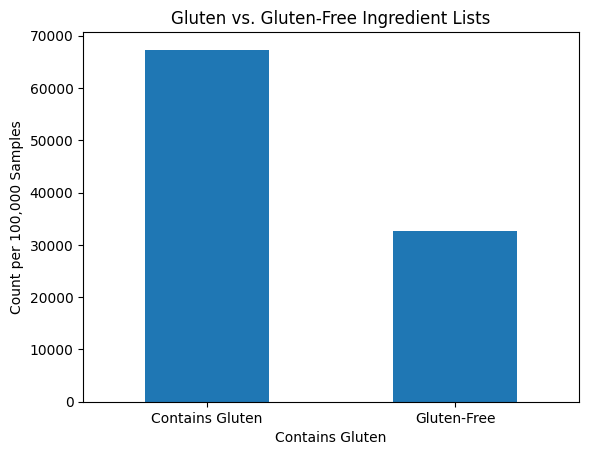

In [ ]:
import matplotlib.pyplot as plt

# Bar Chart of Gluten vs. Gluten-Free Ingredient Lists
df['contains_gluten'].value_counts().plot(kind='bar')
plt.xlabel('Contains Gluten')
plt.ylabel('Count per 100,000 Samples')
plt.title('Gluten vs. Gluten-Free Ingredient Lists')
plt.xticks([0, 1], ['Contains Gluten', 'Gluten-Free'], rotation=0)
plt.show()

<hr>

<span style="color:#2E74B5">
  <h3 style="margin-bottom: 0;">Bar Plot</h3>
</span> <p style="margin-top: 0;">The bar plot below compares the average ingredient list lengths for gluten and gluten-free products. This visualization helps in understanding whether there is a difference in the length of ingredient lists between the two categories.
</p>

<span style="color:#2E74B5">
  <h4 style="margin-bottom: 0; margin-left: 15px">Theory</h4>
</span> <p style="margin-top: 0; margin-left: 15px">One possible explanation for any observed difference in ingredient list lengths is that gluten-free products may contain more ingredients to emulate the texture and flavor of gluten-containing products.
</p>

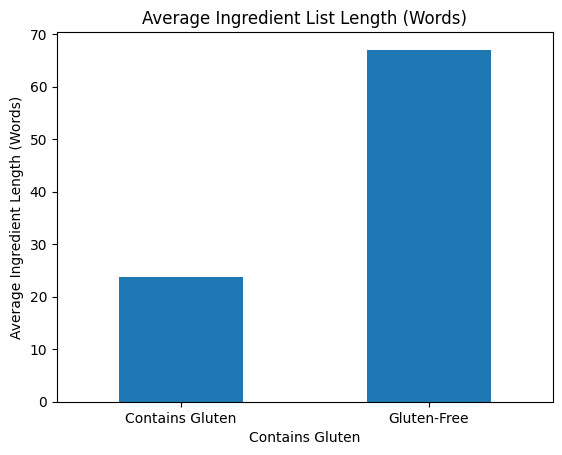

In [ ]:
import matplotlib.pyplot as plt

# Calculate Average Ingredient Length (Words)
df['ingredients_length_words'] = df['ingredients'].apply(lambda x: len(x.split()))

# Bar Plot of Average Ingredient Length (Words)
average_length_words = df.groupby('contains_gluten')['ingredients_length_words'].mean()
average_length_words.plot(kind='bar')
plt.xlabel('Contains Gluten')
plt.ylabel('Average Ingredient Length (Words)')
plt.title('Average Ingredient List Length (Words)')
plt.xticks([0, 1], ['Contains Gluten', 'Gluten-Free'], rotation=0)
plt.show()

<hr>

<span style="color:#2E74B5">
  <h3 style="margin-bottom: 0;">Confusion Matrix</h3>
</span> <p style="margin-top: 0;">The confusion matrix below illustrates the performance of the logistic regression model. It shows the number of positive, negative, false positive, and false negative predictions, helping to evaluate the model's accuracy.
</p>

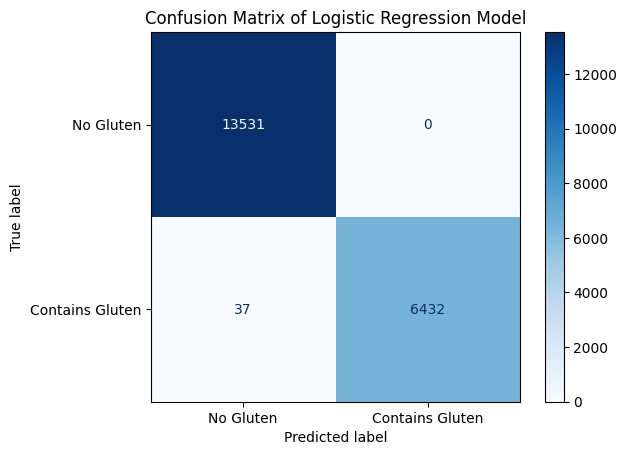

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict Test Set Results
y_pred = model.predict(x_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Gluten', 'Contains Gluten'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

<hr>

<span style="color:#2E74B5">
  <h3 style="margin-bottom: 0;">Histogram</h3>
</span> <p style="margin-top: 0;">The histogram below shows the ingredient lengths distribution for gluten and gluten-free products. This visualization helps to compare the frequency and distribution of ingredient list lengths across the two categories, providing insights into common ingredient list sizes and any noticeable differences between gluten-containing and gluten-free products.
</p>

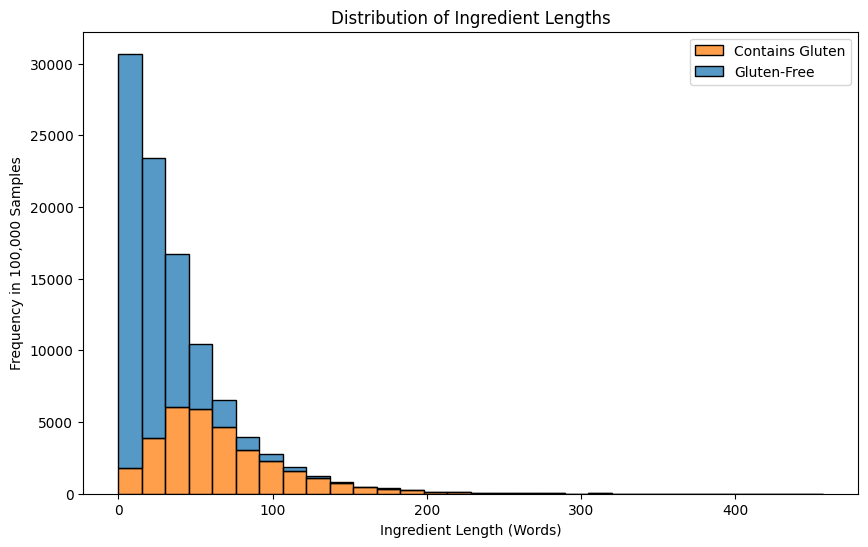

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Ingredient Lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ingredients_length_words', hue='contains_gluten', multiple='stack', bins=30)
plt.xlabel('Ingredient Length (Words)')
plt.ylabel('Frequency in 100,000 Samples')
plt.title('Distribution of Ingredient Lengths')
plt.legend(['Contains Gluten', 'Gluten-Free'])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4210be9-12e1-4925-b3c1-2b6fa04f9608' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>